In [1]:
    import numpy as np
    import pandas as pd
    import seaborn as sns
    from matplotlib import pyplot as plt
    %matplotlib inline
    import math
    
    
    titanic_data_train = pd.read_csv('D:/Scripts/train.csv')
    titanic_data_train.head(10)
    
    titanic_data_test = pd.read_csv('D:/Scripts/test.csv')
    titanic_data_test.head(10)

    y_Pred = pd.read_csv('D:/Scripts/test.csv')
    
    

    print("# of rows in Train Set : " + str(len(titanic_data_train.index)))
    
    print("# of rows in Test Set: " + str(len(titanic_data_test.index)))

# of rows in Train Set : 891
# of rows in Test Set: 418


In [2]:
y_Pred.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1100,1,"Rosenbaum, Miss. Edith Louise",female,33.0,0,0,PC 17613,27.7208,A11,C
1,1223,1,"Dulles, Mr. William Crothers",male,39.0,0,0,PC 17580,29.7000,A18,C
2,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
3,1004,1,"Evans, Miss. Edith Corse",female,36.0,0,0,PC 17531,31.6792,A29,C
4,1185,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

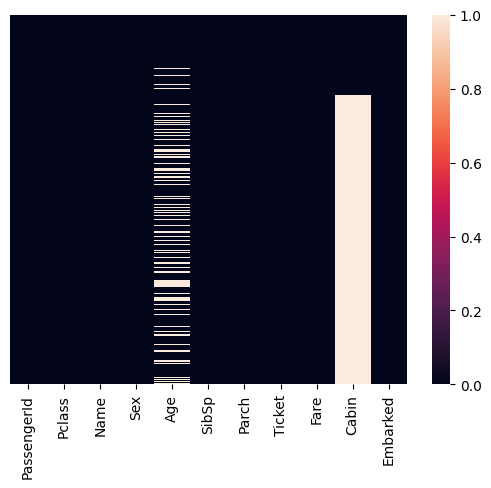

In [3]:
#sns.heatmap(titanic_data_train.isnull(), yticklabels=False)
sns.heatmap(titanic_data_test.isnull(), yticklabels=False)
titanic_data_test.isnull().sum()

<Axes: >

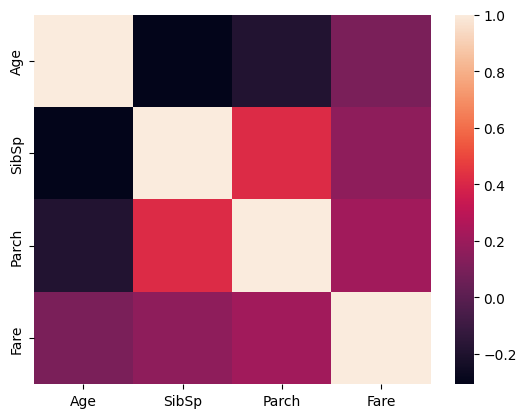

In [4]:
#seperate the data into numeric and categorical
df_num = titanic_data_train[['Age','SibSp','Parch','Fare']]
df_cat = titanic_data_train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

titanic_data_train.drop(['PassengerId'], axis=1, inplace=True)
#Drop passengerId  as it dosn't correlate to survival, won't drop it from test as it required
#will not drop passengerId from test as it is  required for submission

sns.heatmap(df_num.corr())
#High Correlation between Parch ans SibSp
#Parents generally travel with their 1 or more kids
#Children travel with their single or both parents and/or siblings

In [5]:
pd.pivot_table(titanic_data_train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])
#The average age of survivors is 28, so young people tend to survive more.
#People who paid higher fare rates were more likely to survive, more than double. This might be the people traveling in first-class. Thus the rich survived, which is kind of a sad story in this scenario.
#In the 3rd column, If you have parents, you had a higher chance of surviving. So the parents might’ve saved the kids before themselves, thus explaining the rates
#And if you are a child, and have siblings, you have less of a chance of surviving

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [6]:
pd.pivot_table(titanic_data_train, index = 'Survived', columns='Pclass', values='Ticket', aggfunc='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [7]:
pd.pivot_table(titanic_data_train, index = 'Survived', columns='Sex', values='Ticket', aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [8]:
pd.pivot_table(titanic_data_train, index = 'Survived', columns='Embarked', values='Ticket', aggfunc='count')
# 33% people who embarked at Southampton survived
# 55% people who embarked at Cherbough survived
# 38% people who embarked at Queenstown survived

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


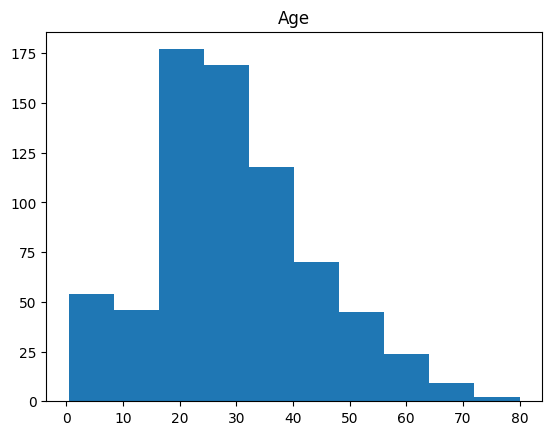

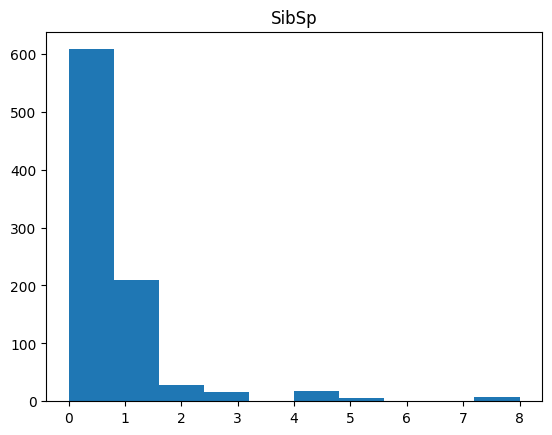

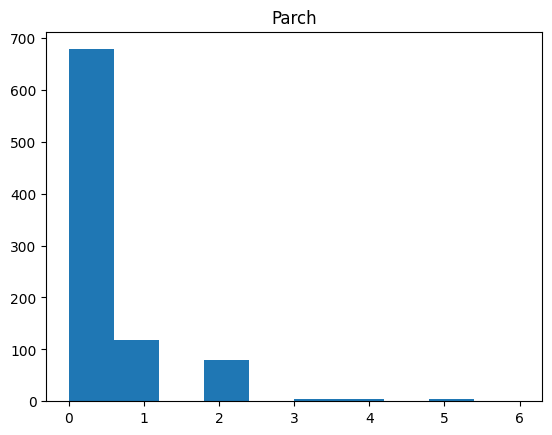

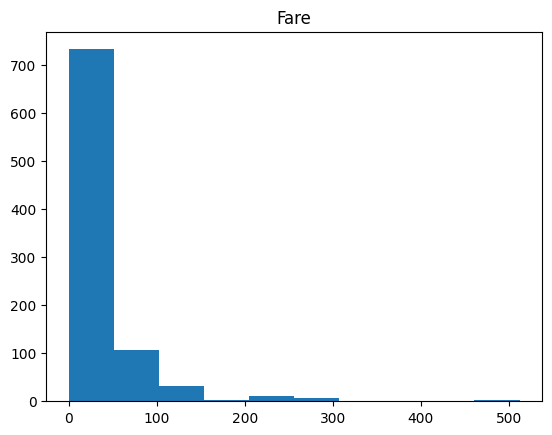

In [9]:
#all numerical columns plotted as histogram
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [10]:
#Categorical values analysis
titanic_data_train['cabin_multiple'] = titanic_data_train.Cabin.apply(lambda x: 0 if pd.isna(x) 
                                                    else len(x.split(' ')))
titanic_data_train['cabin_multiple'].value_counts()

titanic_data_test['cabin_multiple'] = titanic_data_test.Cabin.apply(lambda x: 0 if pd.isna(x) 
                                                    else len(x.split(' ')))
titanic_data_train['cabin_multiple'].value_counts()

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [11]:
pd.pivot_table(titanic_data_train, index = 'Survived', columns = 'cabin_multiple',
               values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [12]:
titanic_data_train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [13]:
import re
# n stands for null
deck_dict ={"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7, "U":8}
datum = [titanic_data_train, titanic_data_test]

for dataset in datum:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: str(x)[0])
    dataset['Deck'] = dataset['Deck'].map(deck_dict) 
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)



In [14]:
titanic_data_train.drop(['Cabin'], axis=1, inplace=True)
titanic_data_test.drop(['Cabin'], axis=1, inplace=True)
titanic_data_train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_multiple,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,8


## Name

In [15]:
# STRIP THE TITLE


In [16]:
#print(titanic_data_train['title'].value_counts())
#print(titanic_data_test['title'].value_counts())

In [17]:
titles_dict ={"Mr":1, "Miss":2, "Mrs":3,"Master":4, "Rare":5 }
data  = [titanic_data_train,titanic_data_test]

for dataset in data:
    dataset['title'] = dataset.Name.apply(lambda x: x.split(',')[1]
                                                        .split('.')[0].strip())
    dataset['title'] = dataset['title'].replace(['Dr','Rev','Major','Col',\
                                                           'the Countess','Capt','Sir',\
                                                           'Lady','Don','Jonkheer'],'Rare') 
    dataset['title'] = dataset['title'].replace('Mlle','Miss')
    dataset['title'] = dataset['title'].replace('Ms','Mrs')
    dataset['title'] = dataset['title'].replace('Mme','Mrs')
    dataset['title'] = dataset['title'].map(titles_dict)
    dataset['title'] = dataset['title'].fillna(0)
    dataset['title'] = dataset['title'].astype(int)

In [18]:
pd.pivot_table(titanic_data_train, index = 'Survived', columns = 'title',
               values = 'Ticket' ,aggfunc ='count')

title,1,2,3,4,5
Survived,,,,,
0,436,55,26,17,15
1,81,129,101,23,8


In [19]:
titanic_data_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_multiple,Deck,title
0,1100,1,"Rosenbaum, Miss. Edith Louise",female,33.0,0,0,PC 17613,27.7208,C,1,1,2
1,1223,1,"Dulles, Mr. William Crothers",male,39.0,0,0,PC 17580,29.7000,C,1,1,1
2,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,S,1,1,1
3,1004,1,"Evans, Miss. Edith Corse",female,36.0,0,0,PC 17531,31.6792,C,1,1,2
4,1185,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,S,1,1,5


# Normalization of Age

In [20]:
all_data = [titanic_data_train,titanic_data_test]
total_data = pd.concat([titanic_data_train,titanic_data_test], ignore_index=True)

mean= total_data['Age'].mean()
std_dev = total_data['Age'].std()


for dataset in all_data:
#      mean = titanic_data_train['Age'].mean()
#      std_dev = titanic_data_train['Age'].std()
      is_null = dataset['Age'].isnull().sum()
    
      rand_age = np.random.randint(mean - std_dev, mean + std_dev, size=is_null)

      age_slice = dataset['Age'].copy()
      age_slice[np.isnan(age_slice)] = rand_age
      dataset['Age'] = age_slice
      dataset['Age'] = dataset['Age'].astype(int)
    
titanic_data_train['Age'].isnull().sum()
    ## Despite random values in blank rows, the mean age remains same

0

In [21]:
all_data = [titanic_data_train,titanic_data_test]
for dataset in all_data:
    dataset.loc[dataset['Age'] <=11,'Age'] = 0
    dataset.loc[(dataset['Age'] >11) & (dataset['Age'] <=18),'Age'] = 1
    dataset.loc[(dataset['Age'] >18) & (dataset['Age'] <=33),'Age'] = 2
    dataset.loc[(dataset['Age'] >22) & (dataset['Age'] <=27),'Age'] = 3
    dataset.loc[(dataset['Age'] >27) & (dataset['Age'] <=33),'Age'] = 4
    dataset.loc[(dataset['Age'] >33) & (dataset['Age'] <=40),'Age'] = 5
    dataset.loc[(dataset['Age'] >40) & (dataset['Age'] <=66),'Age'] = 6
    dataset.loc[(dataset['Age'] >66),'Age'] = 7

In [22]:
titanic_data_train['Age'].describe()
pd.pivot_table(titanic_data_train, index = 'Survived', columns = 'Age',
               values = 'Ticket' ,aggfunc ='count')

Age,0,1,2,5,6,7
Survived,,,,,,
0,29,57,274,83,100,6
1,39,35,148,60,59,1


## EMBARKED

In [23]:
print(titanic_data_train['Embarked'].mode())
titanic_data_train['Embarked'].fillna(titanic_data_train['Embarked'].mode()[0],inplace=True)
titanic_data_train.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
titanic_data_test.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

0    S
Name: Embarked, dtype: object


In [24]:
titanic_data_train.head(5)
titanic_data_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_multiple,Deck,title
0,1100,1,"Rosenbaum, Miss. Edith Louise",1,2,0,0,PC 17613,27.7208,1,1,1,2
1,1223,1,"Dulles, Mr. William Crothers",0,5,0,0,PC 17580,29.7000,1,1,1,1
2,920,1,"Brady, Mr. John Bertram",0,6,0,0,113054,30.5000,0,1,1,1
3,1004,1,"Evans, Miss. Edith Corse",1,5,0,0,PC 17531,31.6792,1,1,1,2
4,1185,1,"Dodge, Dr. Washington",0,6,1,1,33638,81.8583,0,1,1,5


## Normalization of Fare

In [25]:
all_fare_data = [titanic_data_train,titanic_data_test]

for dataset in all_fare_data:
      dataset['Fare'] = dataset['Fare'].fillna(0)
      dataset['Fare'] = dataset['Fare'].astype(int)

titanic_data_train['Fare'].describe()

count    891.000000
mean      31.785634
std       49.703730
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

In [26]:
datum = [titanic_data_train,titanic_data_test] 

for dataset in datum:
     #Access a group of rows
    dataset.loc[(dataset['Fare'] <= 7.91),'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.45) ,'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.45) & (dataset['Fare'] <= 31) ,'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99) ,'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 200) ,'Fare'] = 4
    dataset.loc[(dataset['Fare'] > 200),'Fare' ] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

pd.pivot_table(titanic_data_train, index = 'Survived', columns = 'Fare',
               values = 'Ticket' ,aggfunc ='count')

Fare,0,1,2,3,4,5
Survived,,,,,,
0,189,154,121,71,8,6
1,52,62,102,87,25,14


In [27]:
datum = [titanic_data_train,titanic_data_test] 

for dataset in datum:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] == 0, 'relatives'] = 0
    dataset.loc[(dataset['relatives'] > 0) & (dataset['relatives'] <= 3), 'relatives'] = 1
    dataset.loc[(dataset['relatives'] > 3) & (dataset['relatives'] <= 5), 'relatives'] = 0
    dataset.loc[(dataset['relatives'] == 6), 'relatives'] = 1
    dataset.loc[(dataset['relatives'] > 6), 'relatives'] = 0
    dataset['relatives'] = dataset['relatives'].astype(int)

titanic_data_train['relatives'].value_counts()


relatives
0    587
1    304
Name: count, dtype: int64

In [28]:
#axes = sns.factorplot('relatives','Survived', data=titanic_data_train, aspect = 2.5, )

In [29]:
#embarked_dummies = pd.get_dummies(titanic_data_train['Embarked'], drop_first=True)
#embarked_test = pd.get_dummies(titanic_data_test['Embarked'], drop_first=True)
titanic_data_train.drop(['Name','Ticket','SibSp','Parch'], axis=1, inplace=True)
titanic_data_test.drop(['Name','Ticket','SibSp','Parch'], axis=1, inplace=True)

In [30]:
titanic_data_train.tail(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_multiple,Deck,title,relatives
886,0,2,0,2,1,0,0,8,5,0
887,1,1,1,2,2,0,1,2,2,0
888,0,3,1,1,2,0,0,8,2,1
889,1,1,0,2,2,1,1,3,1,0
890,0,3,0,2,0,2,0,8,1,0


In [31]:
titanic_data_test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,cabin_multiple,Deck,title,relatives
0,1100,1,1,2,2,1,1,1,2,0
1,1223,1,0,5,2,1,1,1,1,0
2,920,1,0,6,2,0,1,1,1,0
3,1004,1,1,5,2,1,1,1,2,0
4,1185,1,0,6,3,0,1,1,5,1
5,1266,1,1,6,3,0,1,1,3,1
6,938,1,0,6,2,1,1,1,1,0
7,1058,1,0,6,3,1,1,2,1,0
8,1107,1,0,6,3,0,1,2,1,0
9,1282,1,0,2,3,0,1,2,1,0


In [32]:
titanic_data_train.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age               0
Fare              0
Embarked          0
cabin_multiple    0
Deck              0
title             0
relatives         0
dtype: int64

##  Train and Test Data

In [33]:
titanic_data_test.isnull().sum()

PassengerId       0
Pclass            0
Sex               0
Age               0
Fare              0
Embarked          0
cabin_multiple    0
Deck              0
title             0
relatives         0
dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
titanic_data_train.columns = titanic_data_train.columns.astype(str)
X = titanic_data_train.drop(['Survived'], axis=1)
y = titanic_data_train["Survived"]


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [35]:
X_train =  X
Y_train = y

titanic_data_test.columns = titanic_data_test.columns.astype(str)
X_test = titanic_data_test.drop(['PassengerId'], axis=1)


test_csv = X_test.to_csv('Titanic_Variables', index=True)

In [36]:
#from sklearn.preprocessing import StandardScaler
 
# compute required values
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)


In [37]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter = 2000)
logmodel.fit(X_train,Y_train)

LogisticRegression(max_iter=2000)

In [38]:
X_test_predictions = logmodel.predict(X_test)

In [39]:
#from sklearn.metrics import accuracy_score

#accuracy_score(y_test,X_test_predictions)

y_Pred = y_Pred.drop(['Name','Pclass','Sex','Age','SibSp','Parch','Ticket','Cabin','Fare','Embarked'], axis=1)


In [40]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test) 

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("acc_decision_tree :"+ str(acc_decision_tree))

acc_decision_tree :90.46


In [41]:
from sklearn.neighbors import KNeighborsClassifier
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred_Knn = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

print("acc_Knn_neighbours :"+ str(acc_knn))

acc_Knn_neighbours :86.64


In [42]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("acc_random_forest :"+ str(acc_random_forest))

acc_random_forest :90.46


In [43]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred_NB = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print("acc_gaussian :"+ str(acc_gaussian))

acc_gaussian :75.65


In [44]:
y_Pred['Survived']= X_test_predictions
#y_Pred['Survived']= Y_pred
#y_Pred['Survived']= Y_prediction
#y_Pred['Survived']= Y_pred_Knn
#y_Pred['Survived']= Y_pred_NB
y_Pred.head(5)

,PassengerId,Survived
0,1100,1
1,1223,0
2,920,0
3,1004,1
4,1185,1


In [45]:
pred_csv = y_Pred.to_csv('Titanic_Survival_Prediction', index=True)